# 손실 곡선

- print() 명령을 사용하지 않아도 마지막 라인의 실행 결과를 자동으로 출력함
- fit() 메서드는 History 클래스 객체를 반환함

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = \
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [3]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

- verbose로 훈련 과정을 조절함
  - 0: 안보임
  - 1: 기본값
  - 2: 진행 막대 빼고 출력됨

In [5]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


- 손실과 정확도가 포함되어 있음

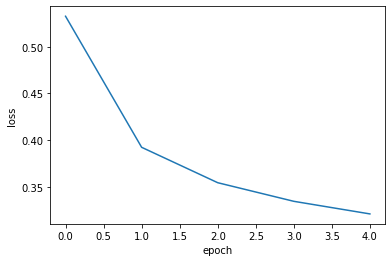

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

- epochs가 0에서부터 4까지 x축에 표현됨

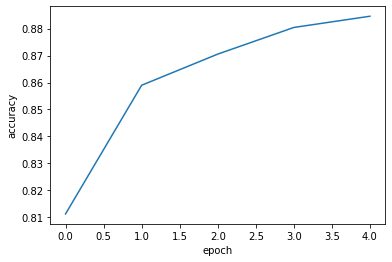

In [8]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

- 에포크 횟수가 클수록 정확도 높아짐

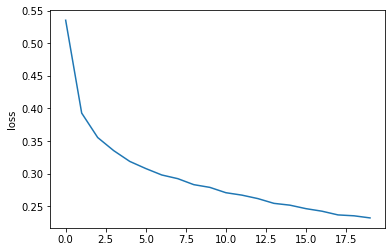

In [9]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.show()

- 과대적합 문제 발생할 수 있음

- fit() 메서드에 검증 데이터를 전달할 수 있음

In [10]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


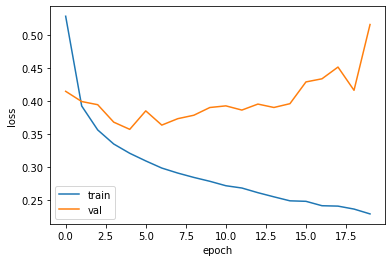

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

- 다섯 번째 에포크 만에 다시 상승하기 시작함
- epoch가 증가하면 과대적합 모델이 만들어짐
- 규제를 적용할 수 있음

- 에포크가 진행될 수록 Adam은 학습률의 크기를 조정함

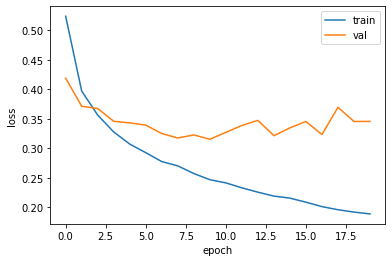

In [13]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 드롭아웃
- 신경망에서 사용하는 대표적인 규제 방법

- 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막음

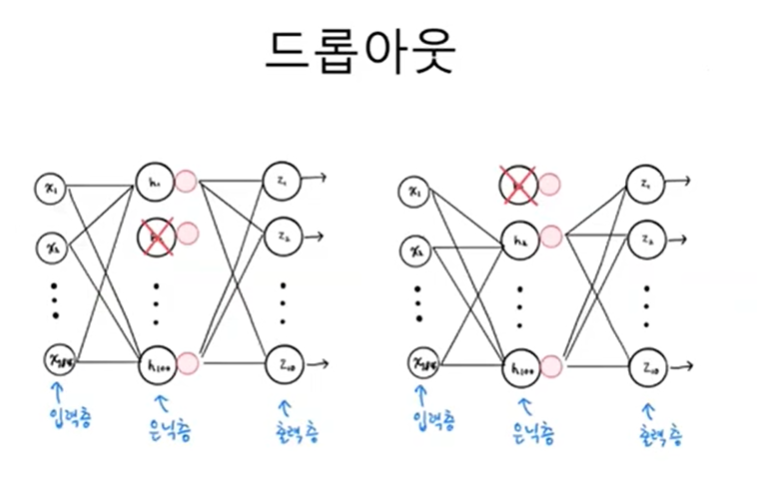

- 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄임
- 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있음

In [14]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


- 전체 크기에 변화는 없음
- 훈련이 끝난 뒤에는 드롭아웃을 적용하면 안됨

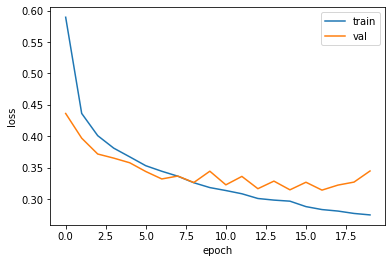

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

- 에포크 횟수를 10 정도로 하면 좋음

# 모델 저장과 복원

In [16]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, 
                    validation_data=(val_scaled, val_target))

- 케라스 모델은 훈련된 모델의 파라미터를 저장하는 간편한 save_weights()메서드를 제공함

In [17]:
model.save_weights('model-weights.h5')

- 모델 구조와 모델 파라미터를 함께 저장하는 save() 메서드도 제공함

In [18]:
model.save('model-whole.h5')

In [19]:
# 잘 만들어졌는지 확인
!ls -al *.h5

-rw-r--r-- 1 root root 333448 May 18 10:46 model-weights.h5
-rw-r--r-- 1 root root 982664 May 18 10:46 model-whole.h5


- 모델을 만들고 훈련시키지 않고 불러오기

In [21]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

- 가중치를 불러올 때는 반드시 구조가 같아야 함

- 이 모델의 검증 정확도를 확인해 보겠음
- keras 예측을 수행하는 predict() 메서드는 사이킷런과 달리 샘플마다 10개의 클래스에 대한 확률을 반환함

In [22]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

0.8834166666666666


In [25]:
print(model.predict(val_scaled))

[[8.99458108e-09 2.54008537e-15 1.60374020e-10 ... 5.75698422e-08
  9.99996305e-01 3.78176142e-13]
 [1.02718866e-06 5.67130842e-10 3.11614855e-07 ... 2.86271590e-10
  9.99997020e-01 2.33832148e-10]
 [1.11211665e-11 5.32207915e-12 5.24783116e-15 ... 9.99623299e-01
  2.92355223e-10 6.02891305e-06]
 ...
 [6.97440046e-05 3.70322750e-09 1.07401538e-05 ... 1.35396121e-07
  9.99867916e-01 1.87667936e-07]
 [8.89910368e-09 2.60628616e-14 4.12776169e-09 ... 2.44197392e-12
  1.00000000e+00 5.05996836e-16]
 [6.63987547e-02 7.51603864e-08 2.31521134e-03 ... 4.04011116e-05
  1.42708268e-05 1.01769287e-02]]


In [26]:
print(model.predict(val_scaled).shape)

(12000, 10)


- 모델의 predict() 메서드 결과에서 가장 큰 값을 고르기 위해 argmax() 함수를 사용했음
- axis = -1은 배열의 마지막 차원을 의미

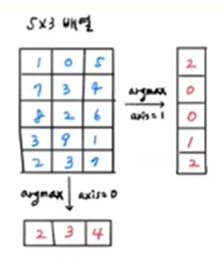

In [27]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3243 - accuracy: 0.8834


[0.32431936264038086, 0.8834166526794434]

# 콜백
- 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체

- fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용함
- ModelCheckpoint 콜백은 기본적으로 에포크마다 모델을 저장함

In [28]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

- 모델이 훈련한 후에 best-model.h5에 최상의 검증 점수를 낸 모데이 저장됨

In [29]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3137 - accuracy: 0.8878


[0.31370824575424194, 0.8878333568572998]

- 검증 점수가 상승하기 시작하면 그 이후에는 과대적합이 커지기 때문에 훈련을 계속할 필요 없음
- 과대적합이 시작되기 전에 훈련을 미리 중지하는 것을 **조기종료** 라고 함

- EarlyStopping 콜백을 제공함
  - patience = 2로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련 중지
  - restore_best_weights 매개변수를 True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
---
- EarlyStopping 콜백을 ModelCheckpoint 콜백과 함께 사용하면 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지할 수 있음
  - 중지한 다음 최상의 파라미터로 되돌림

In [30]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

- 훈련을 마치고 몇 번째 에포크에서 훈련이 중지되었는지 알 수 있음

In [31]:
print(early_stopping_cb.stopped_epoch)

13


- patience를 2로 지정했으므로 최상의 모델은 12번째 에포크일 것임

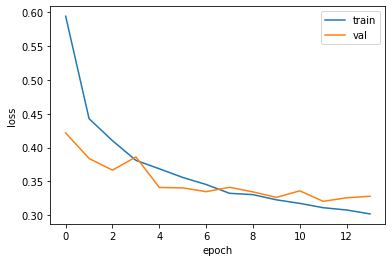

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

- 12 에포크에서 최적인 것을 볼 수 있음


In [33]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3203 - accuracy: 0.8842


[0.32030189037323, 0.8841666579246521]

In [34]:
train_scaled

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.